<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Algoritmos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

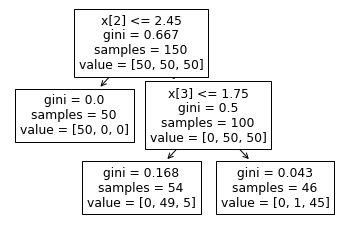

In [ ]:
tree.plot_tree(clf)

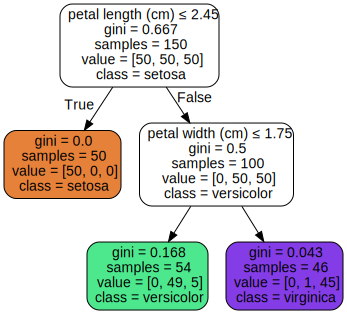

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# nesse caso caso uma folha tenha 5 cm de comprimento e 1.5cm de largura, teremos 90% de chance dela pertencer a classe versicolor

## Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
%%time
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 396 ms, sys: 6.03 ms, total: 402 ms
Wall time: 436 ms


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X, y)
  y_pred = clf.predict(X)
  print(clf.__class__.__name__, accuracy_score(y, y_pred))

LogisticRegression 0.9733333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier 1.0
SVC 0.9733333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.98


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
%%time
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap= True, n_jobs = -1)
bag_clf.fit(X,y)
y_pred = bag_clf.predict(X)

CPU times: user 344 ms, sys: 52.9 ms, total: 396 ms
Wall time: 4.68 s


In [ ]:
bag_clf.score(X, y_pred)

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X, y)

CPU times: user 1.69 s, sys: 80.1 ms, total: 1.77 s
Wall time: 2.18 s


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [ ]:
y_pred_rf = rnd_clf.predict(X) 

In [ ]:
print(accuracy_score(y, y_pred_rf))

1.0


An ensemble model combines different machine learning models into one and perform better than alone.

Boosting is a strong alternative to bagging. Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models (usually Decision Trees) went wrong. In Gradient Boosting, individual models train upon the residuals, the difference between the prediction and the actual results. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round.

XGBoost is short for “eXtreme Gradient Boosting.” The “eXtreme” refers to speed enhancements such as parallel computing and cache awareness that makes XGBoost approximately 10 times faster than traditional Gradient Boosting. In addition, XGBoost includes a unique split-finding algorithm to optimize trees, along with built-in regularization that reduces overfitting. Generally speaking, XGBoost is a faster, more accurate version of Gradient Boosting.

Boosting performs better than bagging on average, and Gradient Boosting is arguably the best boosting ensemble. Since XGBoost is an advanced version of Gradient Boosting, and its results are unparalleled, it’s arguably the best machine learning ensemble that we have.

<br/>

### Why should you learn XGBoost

- **XGBoost** is *easy to implement* in scikit-learn.
- **XGBoost** *is an ensemble*, so it scores better than individual models.
- **XGBoost** is regularized, so default models often *don’t overfit*.
- **XGBoost** is *very fast* (for ensembles).
- **XGBoost** *learns form its mistakes (gradient boosting)*.
- **XGBoost** *has extensive hyperparameters* for fine-tuning.
- **XGBoost** includes hyperparameters to *scale* imbalanced data and fill null values.

In [ ]:
## XGBoost

!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import xgboost; print(xgboost.__version__)

1.7.4


In [2]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)

In [5]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(XGBRegressor(n_estimators=600), X, y, scoring='neg_mean_squared_error')
(-scores)**0.5

array([62.8037234 , 65.78374862, 62.21464301, 66.41705052, 67.32538005])

In [ ]:
url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/heart_disease.csv'

import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


df = pd.read_csv(url)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

cross_val_score(XGBClassifier(), X, y)

array([0.83606557, 0.85245902, 0.81967213, 0.8       , 0.76666667])